# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv("cement_slump.csv")

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


* Dataframe consists of 103 observations and 9 features. There is no null value in the data and all features are float.

# EDA and Graphical analysis

In [6]:
df["w/c"] = df['Water']/df['Cement']
df["sp/c"] = df['SP']/df['Cement']

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df = df.rename(columns = {'compressive_strength_(28-day)(mpa)': 'CS'})

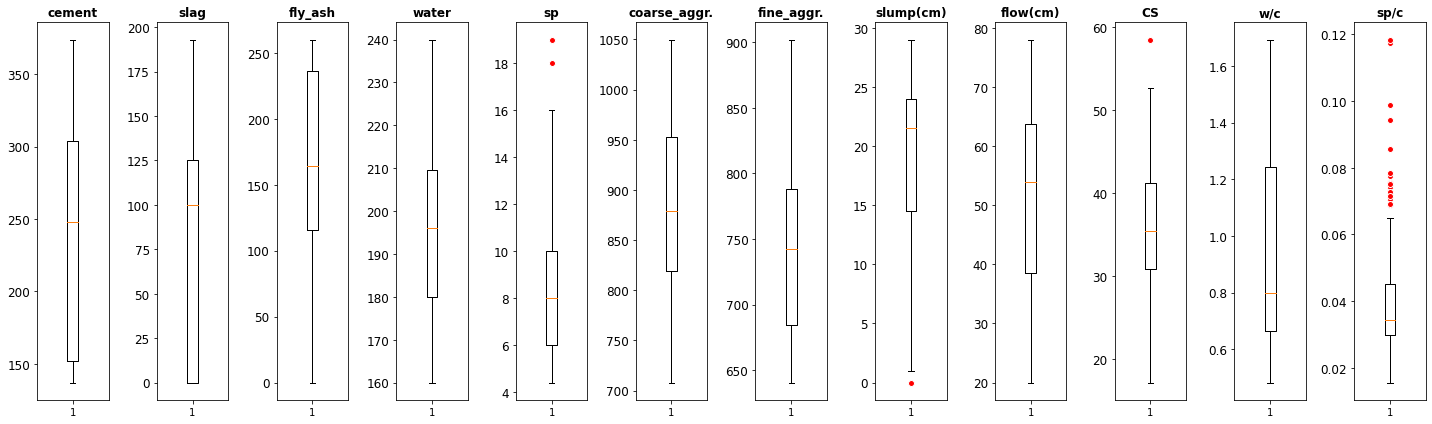

In [9]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,6))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

* In this data main features are 'cement', 'slag', 'fly_ash', 'water', 'sp', 'coarse_aggr.','fine_aggr.'.
* Also 'w/c', 'sp/c' columns added, in order to test the effects of this columns on the target variable. But in the main model this features will not included. 
* Outlier analysis: 
    * In main features, it is shown that only two outlier in sp column.
    * There is a outlier in target variable CS.
    * There are many outliers in sp/c column but since this column was created from sp and cement column, these are not admitted as outliers for the all data.


In [10]:
df[df.CS>50]  # The outlier in CS column is not seem anomaly. 

,cement,slag,fly_ash,water,sp,coarse_aggr.,fine_aggr.,slump(cm),flow(cm),CS,w/c,sp/c
32,366.000,0.000,187.000,191.000,7.000,824.000,757.000,24.750,62.700,52.650,0.522,0.019
48,332.000,0.000,170.000,160.000,6.000,900.000,806.000,0.000,20.000,58.530,0.482,0.018
49,326.000,0.000,167.000,174.000,6.000,884.000,792.000,21.500,42.000,52.650,0.534,0.018
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230,0.682,0.031
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500,0.677,0.029


In [11]:
df[df.sp>14]   # The outliers in sp column are not seem anomaly. 

,cement,slag,fly_ash,water,sp,coarse_aggr.,fine_aggr.,slump(cm),flow(cm),CS,w/c,sp/c
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810,1.105,0.099
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080,1.105,0.117
6,152.000,139.000,178.000,168.000,18.000,944.000,695.000,0.000,20.000,38.860,1.105,0.118
15,159.000,116.000,149.000,175.000,15.000,953.000,720.000,23.500,54.500,34.050,1.101,0.094


**Target Variable: CS density plot**

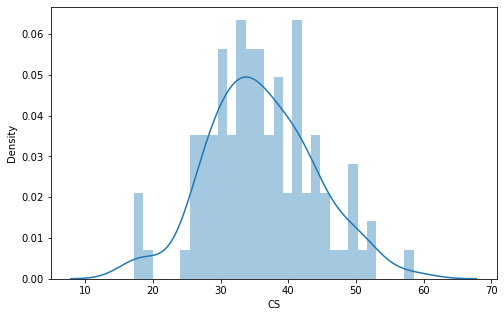

In [12]:
plt.figure(figsize = (8,5))
sns.distplot(df['CS'], kde = True, bins = 30)
plt.show()

In [13]:
df.corr()

,cement,slag,fly_ash,water,sp,coarse_aggr.,fine_aggr.,slump(cm),flow(cm),CS,w/c,sp/c
cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446,-0.926,-0.681
slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332,0.209,0.359
fly_ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444,0.396,0.187
water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254,0.115,-0.254
sp,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038,0.004,0.773
coarse_aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161,0.106,0.114
fine_aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155,0.023,0.017
slump(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223,0.025,-0.277
flow(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124,0.037,-0.274
CS,0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000,-0.536,-0.284


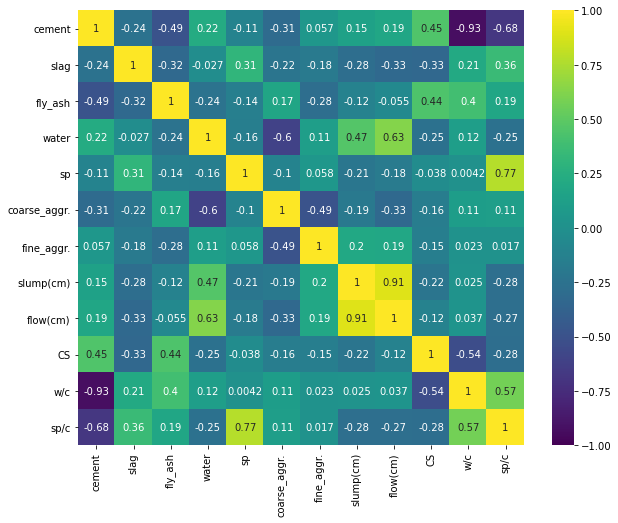

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin = -1, annot=True, cmap="viridis")
plt.show()

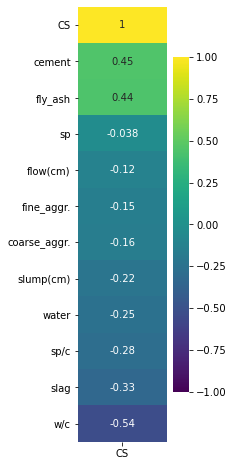

In [15]:
plt.figure(figsize=(2,8))
sns.heatmap(df.corr()[['CS']].sort_values(by='CS', ascending=False), vmin = -1, annot=True, cmap="viridis")
plt.show()

* The two most influential features on the target variable are cement and fly_ash. These features have a positive medium correlation with target variable. 
* However, water, slag, coarse_aggr and fine_aggr have a low negative correlation with target variable. 
* sp feature has almost no effect on target variable.

In [16]:
df1 = df.loc[:,['cement', 'slag', 'fly_ash', 'water', 'sp', 'coarse_aggr.','fine_aggr.','CS']]

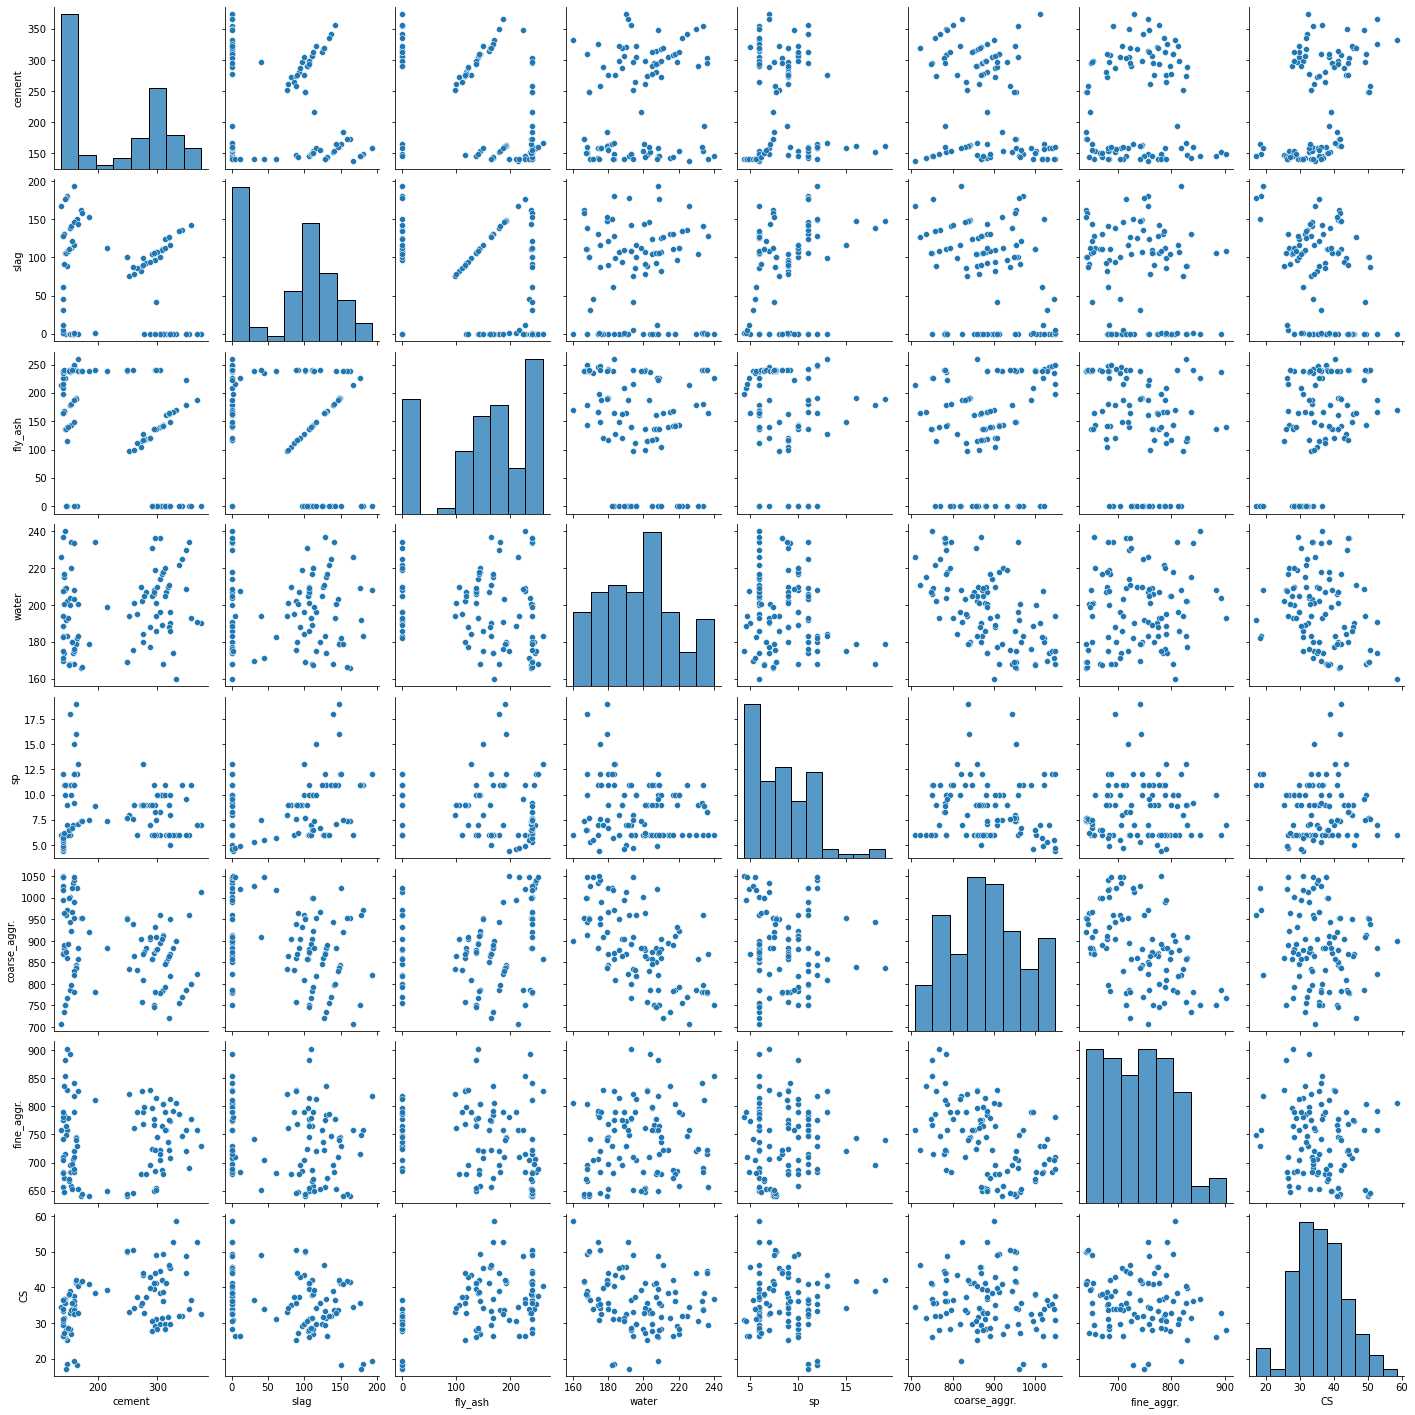

In [17]:
sns.pairplot(df1)
plt.show()

# Data Preprocessing 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

### Features and target variable

In [19]:
X = df.loc[:,['cement', 'slag', 'fly_ash', 'water', 'sp', 'coarse_aggr.','fine_aggr.']]
y = df['CS']

### Splitting data into training and testing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 58)

In [21]:
print('Train features shape:', X_train.shape)
print('Train target shape:', y_train.shape)
print('Test features shape:', X_test.shape)
print('Test target shape:', y_test.shape)

Train features shape: (72, 7)
Train target shape: (72,)
Test features shape: (31, 7)
Test target shape: (31,)


## Scaling

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train_scaled = scaler.transform(X_train) 

In [24]:
X_test_scaled = scaler.transform(X_test)

##  1. Model Building (Linear Regression)

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [27]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

### 1.1 Interpret the model

In [28]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [29]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.911,0.846
mae,1.782,2.120
mse,5.298,9.628
rmse,2.302,3.103


**There is a gap between test and train R2 scores but in order to be sure these scores, cross validation will be applied to the dataset.**

### 1.2 Model Evaluation

In [30]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, 
                       scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                       cv = 5)

In [31]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.851
test_neg_mean_absolute_error       -1.947
test_neg_mean_squared_error        -6.448
test_neg_root_mean_squared_error   -2.519
dtype: float64

**Model was applied to different partitions of the dataset and test_r2 is 0.851. There is a gap between train_r2 and test_r2 which means that there can be an overfitting in the model. Also test_r2_square is not high enough. To obtain a good model and handle overfitting, Ridge and Lasso Regression models will be applied.**

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [32]:
ridge_model = Ridge(alpha=1, random_state = 58)

In [33]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=58)

In [34]:
y_pred_test_ridge = ridge_model.predict(X_test_scaled)
y_pred_train_ridge = ridge_model.predict(X_train_scaled)

In [35]:
rs = train_val(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge, 'ridge_alpha_1')
rs

,ridge_alpha_1_train,ridge_alpha_1_test
R2,0.910,0.845
mae,1.829,2.059
mse,5.369,9.668
rmse,2.317,3.109


In [36]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_alpha_1_train,ridge_alpha_1_test
R2,0.911,0.846,0.910,0.845
mae,1.782,2.120,1.829,2.059
mse,5.298,9.628,5.369,9.668
rmse,2.302,3.103,2.317,3.109


**Ridge method was applied and test scores didn't change. But in here we choose alpha randomly. Maybe with best alpha and cross validation, it can be obtained good results.** 

### Ridge best alpha value with CV

In [37]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [38]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 5, scoring = "neg_root_mean_squared_error")

In [39]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [40]:
y_pred_rcv = ridge_cv_model.predict(X_test_scaled)
y_train_pred_rcv = ridge_cv_model.predict(X_train_scaled)

In [41]:
rcs = train_val(y_train, y_train_pred_rcv, y_test, y_pred_rcv, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.911,0.847
mae,1.813,2.066
mse,5.338,9.592
rmse,2.310,3.097


In [42]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_alpha_1_train,ridge_alpha_1_test,ridge_cv_train,ridge_cv_test
R2,0.911,0.846,0.910,0.845,0.911,0.847
mae,1.782,2.120,1.829,2.059,1.813,2.066
mse,5.298,9.628,5.369,9.668,5.338,9.592
rmse,2.302,3.103,2.317,3.109,2.310,3.097


**With best alpha and cross validation in Ridge method test scores didn't change.** 

## 2.2 Lasso (Apply and evalute)

In [43]:
lasso_model = Lasso(alpha=1, random_state = 58)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=58)

In [44]:
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_train_pred_lasso = lasso_model.predict(X_train_scaled)

In [45]:
lss = train_val(y_train, y_train_pred_lasso, y_test, y_pred_lasso, "lasso")
lss

,lasso_train,lasso_test
R2,0.772,0.618
mae,2.837,3.844
mse,13.638,23.888
rmse,3.693,4.888


In [46]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_alpha_1_train,ridge_alpha_1_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.911,0.846,0.910,0.845,0.911,0.847,0.772,0.618
mae,1.782,2.120,1.829,2.059,1.813,2.066,2.837,3.844
mse,5.298,9.628,5.369,9.668,5.338,9.592,13.638,23.888
rmse,2.302,3.103,2.317,3.109,2.310,3.097,3.693,4.888


**Lasso regression was applied and test scores didn't deccrease. But in here we choose alpha randomly. Maybe with best alpha and cross validation, it can be obtained good results.** 

### Lasso Regression with best alpha and cv

In [47]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=58) 

In [48]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=58)

In [49]:
lasso_cv_model.alpha_

0.04

In [50]:
y_pred_lcv = lasso_cv_model.predict(X_test_scaled)  
y_train_pred_lcv = lasso_cv_model.predict(X_train_scaled)

In [51]:
lcs = train_val(y_train, y_train_pred_lcv, y_test, y_pred_lcv, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.909,0.848
mae,1.842,2.057
mse,5.446,9.524
rmse,2.334,3.086


In [52]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_alpha_1_train,ridge_alpha_1_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.911,0.846,0.910,0.845,0.911,0.847,0.772,0.618,0.909,0.848
mae,1.782,2.120,1.829,2.059,1.813,2.066,2.837,3.844,1.842,2.057
mse,5.298,9.628,5.369,9.668,5.338,9.592,13.638,23.888,5.446,9.524
rmse,2.302,3.103,2.317,3.109,2.310,3.097,3.693,4.888,2.334,3.086


**With best alpha and cross validation in Lasso regression, test scores didn't change.** 

## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [53]:
parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

enet = ElasticNet()
grid = GridSearchCV(enet, parametersGrid, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)
y_pred_test_enet = grid.predict(X_test_scaled)
y_pred_train_enet = grid.predict(X_train_scaled)

In [54]:
enet = train_val(y_train, y_pred_train_enet, y_test, y_pred_test_enet, "ENet")
enet

,ENet_train,ENet_test
R2,0.910,0.847
mae,1.817,2.066
mse,5.372,9.548
rmse,2.318,3.090


In [55]:
pd.concat([ls,rs, rcs, lss, lcs,enet], axis = 1)

,linear_train,linear_test,ridge_alpha_1_train,ridge_alpha_1_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,ENet_train,ENet_test
R2,0.911,0.846,0.910,0.845,0.911,0.847,0.772,0.618,0.909,0.848,0.910,0.847
mae,1.782,2.120,1.829,2.059,1.813,2.066,2.837,3.844,1.842,2.057,1.817,2.066
mse,5.298,9.628,5.369,9.668,5.338,9.592,13.638,23.888,5.446,9.524,5.372,9.548
rmse,2.302,3.103,2.317,3.109,2.310,3.097,3.693,4.888,2.334,3.086,2.318,3.090


## 3. Polynomial Regression

In [56]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    degrees=[]
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=58)
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train_scaled, y_train)
        
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        degrees.append(i)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features, "Degree":degrees}, 
                        index=range(1,d))

In [58]:
poly(5)

,train_rmse_errors,test_rmse_errors,number of features,Degree
1,2.302,3.103,7,1
2,0.377,1.071,35,2
3,0.000,2.037,119,3
4,0.000,1.911,329,4


**For polynomial regression, in order to find best polynomial rmse errors was calculated and second degree polynomial regression was found the best polynomial regression.** 

In [59]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias =False)
poly_features = polynomial_converter.fit_transform(X)
        
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=58)
        
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
        
model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled, y_train)
        
y_train_pred_poly = model.predict(X_train_scaled)
y_test_pred_poly = model.predict(X_test_scaled)

In [60]:
poly = train_val(y_train, y_train_pred_poly, y_test, y_test_pred_poly, "poly")
poly

,poly_train,poly_test
R2,0.998,0.982
mae,0.269,0.788
mse,0.142,1.146
rmse,0.377,1.071


**Test scores of second degree polynomial regression is the best scores in all methods. In order to be sure the scores, cross validation method will be applied.**

In [61]:
scores = cross_validate(model, X_train_scaled, y_train, 
                       scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                       cv = 5)
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.981
test_neg_mean_absolute_error       -0.666
test_neg_mean_squared_error        -0.865
test_neg_root_mean_squared_error   -0.909
dtype: float64

**Cross validation scores shown that test scores are correct.** 

In [62]:
pd.concat([ls,rs, rcs, lss, lcs,enet,poly], axis = 1)

,linear_train,linear_test,ridge_alpha_1_train,ridge_alpha_1_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,ENet_train,ENet_test,poly_train,poly_test
R2,0.911,0.846,0.910,0.845,0.911,0.847,0.772,0.618,0.909,0.848,0.910,0.847,0.998,0.982
mae,1.782,2.120,1.829,2.059,1.813,2.066,2.837,3.844,1.842,2.057,1.817,2.066,0.269,0.788
mse,5.298,9.628,5.369,9.668,5.338,9.592,13.638,23.888,5.446,9.524,5.372,9.548,0.142,1.146
rmse,2.302,3.103,2.317,3.109,2.310,3.097,3.693,4.888,2.334,3.086,2.318,3.090,0.377,1.071


### It was concluded that the second degree polynomial method is the best method among all methods.

# Function of All Methods

In [66]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [67]:
def poly_best(X,y,d):
    
    test_rmse_errors = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=58)
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train_scaled, y_train)
        
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

        test_rmse_errors.append(test_RMSE)
    
    min_rmse = min(test_rmse_errors)
    
    return test_rmse_errors.index(min_rmse)+1

In [63]:
def methods(X,y,test_s):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_s, random_state = 58)
    
    #scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
    
    #linear regression
    lr = LinearRegression()
    lr.fit(X_train_scaled,y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    y_train_pred_lr = lr.predict(X_train_scaled)
    ls = train_val(y_train, y_train_pred_lr, y_test, y_pred_lr, "linear")
    
    #Ridge CV
    alpha_space = np.linspace(0.01, 1, 100)
    ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 5, scoring = "neg_root_mean_squared_error")
    ridge_cv_model.fit(X_train_scaled, y_train)
    y_pred_rcv = ridge_cv_model.predict(X_test_scaled)
    y_train_pred_rcv = ridge_cv_model.predict(X_train_scaled)
    rcs = train_val(y_train, y_train_pred_rcv, y_test, y_pred_rcv, "ridge_cv")
    
    #Lasso CV
    lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=58) 
    lasso_cv_model.fit(X_train_scaled, y_train)
    y_pred_lcv = lasso_cv_model.predict(X_test_scaled)  
    y_train_pred_lcv = lasso_cv_model.predict(X_train_scaled)
    lcs = train_val(y_train, y_train_pred_lcv, y_test, y_pred_lcv, "lasso_cv")
    
    #Elastic Net with Grid
    parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
    enet = ElasticNet()
    grid = GridSearchCV(enet, parametersGrid, scoring='r2', cv=5)
    grid.fit(X_train_scaled, y_train)
    y_pred_test_enet = grid.predict(X_test_scaled)
    y_pred_train_enet = grid.predict(X_train_scaled)
    enet = train_val(y_train, y_pred_train_enet, y_test, y_pred_test_enet, "ENet")

    #poly regression
    i = poly_best(X,y,5)
    polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
    poly_features = polynomial_converter.fit_transform(X)
        
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=58)
        
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
        
    poly = LinearRegression(fit_intercept=True)
    poly.fit(X_train_scaled, y_train)
        
    y_train_pred_poly = poly.predict(X_train_scaled)
    y_test_pred_poly = poly.predict(X_test_scaled)
    
    poly = train_val(y_train, y_train_pred_poly, y_test, y_test_pred_poly, "poly")
    
    return pd.concat([ls,rcs, lcs,enet, poly], axis = 1)
    

### Methods with test size 0.25

In [68]:
X = df.loc[:,['cement', 'slag', 'fly_ash', 'water', 'sp', 'coarse_aggr.','fine_aggr.']]
y = df['CS']

In [69]:
methods(X,y,0.25)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,ENet_train,ENet_test,poly_train,poly_test
R2,0.905,0.864,0.904,0.866,0.902,0.869,0.903,0.867,0.998,0.982
mae,1.761,2.186,1.784,2.126,1.821,2.082,1.790,2.124,0.269,0.788
mse,5.493,9.488,5.543,9.306,5.668,9.147,5.583,9.259,0.142,1.146
rmse,2.344,3.080,2.354,3.051,2.381,3.024,2.363,3.043,0.377,1.071


**When the test size was assigned as 0.25, although polynomial regression scores did not change, other methods scores increased.**

### Exclude sp which has a low correlation with CS

In [70]:
X = df.loc[:,['cement', 'slag', 'fly_ash', 'water', 'coarse_aggr.','fine_aggr.']]
y = df['CS']

In [71]:
methods(X,y,0.25)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,ENet_train,ENet_test,poly_train,poly_test
R2,0.904,0.862,0.903,0.865,0.903,0.865,0.900,0.867,0.996,0.986
mae,1.761,2.223,1.781,2.183,1.781,2.184,1.825,2.153,0.345,0.723
mse,5.512,9.592,5.570,9.383,5.571,9.380,5.751,9.286,0.224,0.861
rmse,2.348,3.097,2.360,3.063,2.360,3.063,2.398,3.047,0.473,0.928


**When sp was excluded, test scores almost did not change.**

### Include 'sp/c' to the train set

In [72]:
X = df.loc[:,['cement', 'slag', 'fly_ash', 'water', 'coarse_aggr.','fine_aggr.', 'sp/c']]
y = df['CS']

In [73]:
methods(X,y,0.25)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,ENet_train,ENet_test,poly_train,poly_test
R2,0.905,0.867,0.904,0.871,0.903,0.875,0.904,0.873,0.998,0.983
mae,1.759,2.154,1.780,2.092,1.808,2.037,1.786,2.070,0.262,0.792
mse,5.484,9.238,5.520,8.997,5.614,8.670,5.544,8.828,0.146,1.043
rmse,2.342,3.039,2.349,3.000,2.369,2.945,2.355,2.971,0.383,1.021


**sp/c has no much effect on CS. Test scores did not change.**

### It was concluded that the second degree polynomial method is the best method among all methods. The features 'cement', 'slag', 'fly_ash', 'water', 'coarse_aggr.','fine_aggr.' are important for 28-day Compressive Strength. If we exclude one of these, test scores decrease. 